In [1]:
import numpy as np # scientific computation
import pandas as pd # Loading dataset file
import matplotlib.pyplot as plt # Visulization
import nltk # Preprocessing our text 
from nltk.corpus import stopwords # removing all the stop words 
from nltk.stem.porter import PorterStemmer # stemming of words
from sklearn.naive_bayes import MultinomialNB
import re
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
import pickle

In [2]:
#Load our dataset
df = pd.read_csv("spam_ham_dataset.csv")

In [3]:
#top five frames of dataset
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
#bottom five frames of dataset
df.tail()

,Unnamed: 0,label,text,label_num
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0
5170,4807,spam,Subject: important online banking alert\r\ndea...,1


In [5]:
df=df.drop("Unnamed: 0",axis=1)

In [6]:
# Return the shape of data
df.shape

(5171, 3)

In [7]:
df.ndim

2

In [8]:
#Return the size of data
df.size

15513

In [9]:
#Returns the sum fo all na values 
df.isna().sum()

label        0
text         0
label_num    0
dtype: int64

In [10]:
#Give concise summary of a DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 121.3+ KB


In [11]:
df.describe() #return improtant values for continous column data

,label_num
count,5171.000000
mean,0.289886
std,0.453753
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [12]:
df.isnull().any()#it will return true if anyFalse column having null values


label        False
text         False
label_num    False
dtype: bool

In [13]:
#find null values
df.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

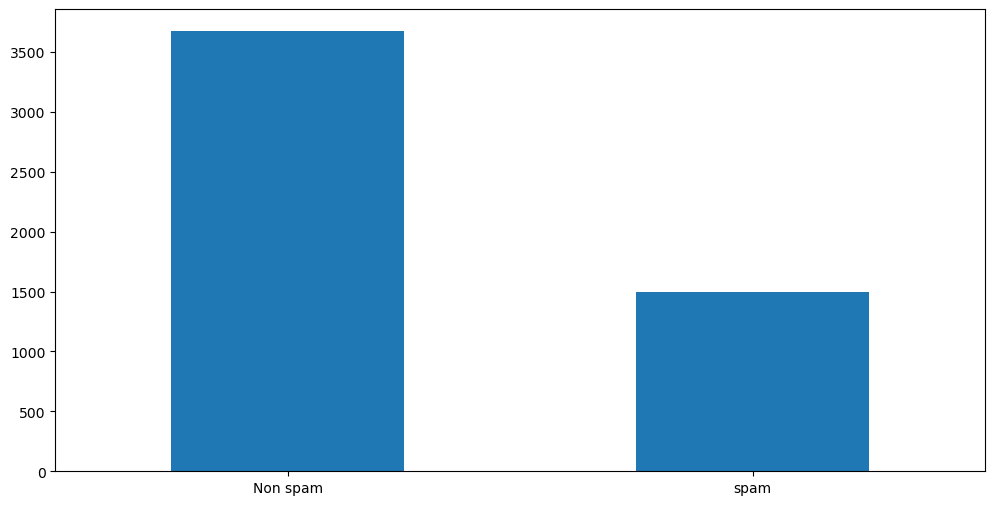

In [14]:
df["label_num"].value_counts().plot(kind="bar",figsize=(12,6))
plt.xticks(np.arange(2), ("Non spam", "spam"),rotation=0);

In [15]:
import re
corpus = []
length = len(df)


In [17]:
for i in range(0,length):
    text = re.sub("[^a-zA-Z0-9]"," ",df["text"][i])
    text = text.lower()
    text = text.split()
    pe = PorterStemmer()
    stopword = stopwords.words("english")
    text = [pe.stem(word) for word in text if not word in set(stopword)]
    text = " ".join(text)
    corpus.append(text)

In [19]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=35000)
X = cv.fit_transform(corpus).toarray()

In [20]:
#Extracting dependent variable from the dataset 
y = pd.get_dummies (df['label'])
y = y.iloc[:, 1].values

In [33]:
import pickle ## importing pickle used for dumping models 
pickle.dump (cv, open("cv-transform.pkl", 'wb')) ##saving to into cv-transform.pall file

In [ ]:
#Splitting data into train and validation sets using train_test_split

from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state= 0)